In [2]:
def readfile(inpath):
    infile=open(inpath)
    linenum=0
    contig_N50=[]
    contig_N50_s=[]
    contig_NA50=[]
    scaffold_N50=[]
    scaffold_NA50=[]
    scaffold_N50_s=[]
    for line in infile:
        A=line.strip('\t\n').split('\t')
        if linenum==1:
            for i in range(1,len(A)):
                contig_N50.append(float(A[i]))
        if linenum==6:
            for i in range(1,len(A)):
                scaffold_N50.append(float(A[i])/1000)
        if linenum==11:
             for i in range(1,len(A)):
                contig_N50_s.append(float(A[i]))
        if linenum==12:
             for i in range(1,len(A)):
                scaffold_N50_s.append(float(A[i])/1000)
        if linenum==13:
             for i in range(1,len(A)):
                contig_NA50.append(float(A[i]))
        if linenum==14:
             for i in range(1,len(A)):
                scaffold_NA50.append(float(A[i])/1000)
        linenum+=1
    return contig_N50,contig_N50_s,contig_NA50,scaffold_N50,scaffold_N50_s,scaffold_NA50

# Plot for simulation on Chr19

### Plot for evaluating $C_R$, comparing 1%, error free and repeat masked genome

In [3]:
dir1='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS1/Calculate_stat.txt'
dir2='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS2/Calculate_stat.txt'
dir3='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS12/Calculate_stat.txt'
[contig_N50_1,contig_N50_s_1,contig_NA50_1,scaffold_N50_1,scaffold_N50_s_1,scaffold_NA50_1]=readfile(dir1)
[contig_N50_2,contig_N50_s_2,contig_NA50_2,scaffold_N50_2,scaffold_N50_s_2,scaffold_NA50_2]=readfile(dir2)
[contig_N50_3,contig_N50_s_3,contig_NA50_3,scaffold_N50_3,scaffold_N50_s_3,scaffold_NA50_3]=readfile(dir3)

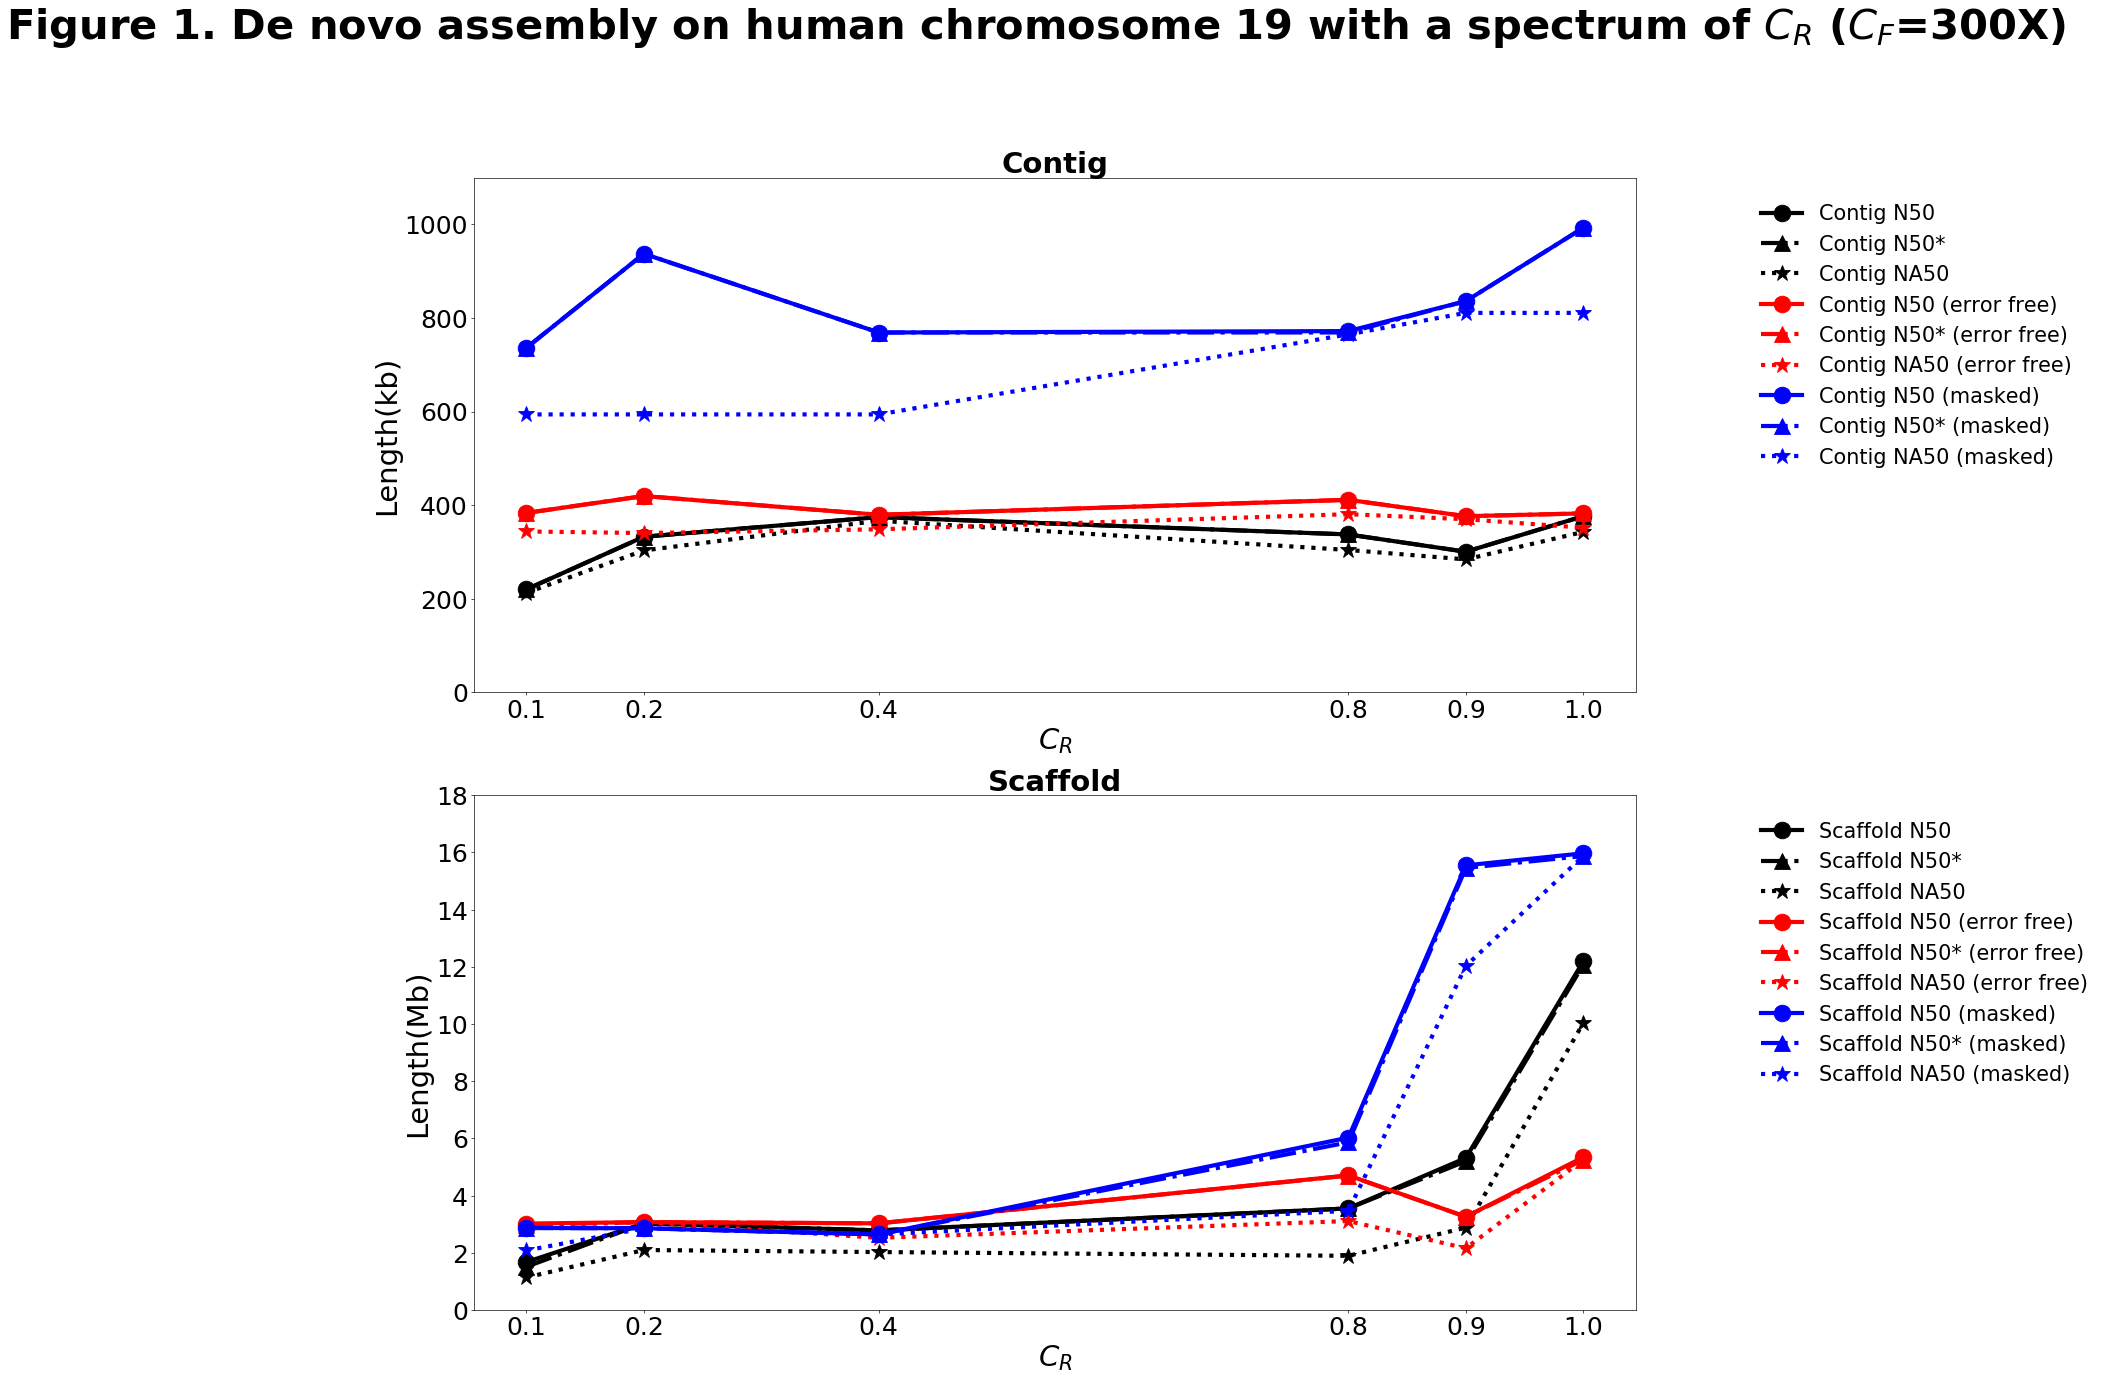

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25),dpi=60)
ax1=plt.subplot(211)
plt.xlabel('$C_R$',fontsize=35)
plt.title('Contig',fontsize=35,fontweight="bold")
x1=[0.1,0.2,0.4,0.8,0.9,1]
ax1.set_xticks([0.1,0.2,0.4,0.8,0.9,1])
ax1.plot(x1,contig_N50_1,'ko-',lw=5,markersize=20,label='Contig N50')
ax1.plot(x1,contig_N50_s_1,'k^-.',lw=5,markersize=20,label='Contig N50*')
ax1.plot(x1,contig_NA50_1,'k*:',lw=5,markersize=20,label='Contig NA50')

ax1.plot(x1,contig_N50_2,'ro-',lw=5,markersize=20,label='Contig N50 (error free)')
ax1.plot(x1,contig_N50_s_2,'r^-.',lw=5,markersize=20,label='Contig N50* (error free)')
ax1.plot(x1,contig_NA50_2,'r*:',lw=5,markersize=20,label='Contig NA50 (error free)')

ax1.plot(x1,contig_N50_3,'bo-',lw=5,markersize=20,label='Contig N50 (masked)')
ax1.plot(x1,contig_N50_s_3,'b^-.',lw=5,markersize=20,label='Contig N50* (masked)')
ax1.plot(x1,contig_NA50_3,'b*:',lw=5,markersize=20,label='Contig NA50 (masked)')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax1.set_ylabel('Length(kb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.ylim((0, 1100)) 


ax1=plt.subplot(212)
plt.xlabel('$C_R$',fontsize=35)
plt.title('Scaffold',fontsize=35,fontweight="bold")
x1=[0.1,0.2,0.4,0.8,0.9,1]
ax1.set_xticks([0.1,0.2,0.4,0.8,0.9,1])
ax1.plot(x1,scaffold_N50_1,'ko-',lw=5,markersize=20,label='Scaffold N50')
ax1.plot(x1,scaffold_N50_s_1,'k^-.',lw=5,markersize=20,label='Scaffold N50*')
ax1.plot(x1,scaffold_NA50_1,'k*:',lw=5,markersize=20,label='Scaffold NA50')

ax1.plot(x1,scaffold_N50_2,'ro-',lw=5,markersize=20,label='Scaffold N50 (error free)')
ax1.plot(x1,scaffold_N50_s_2,'r^-.',lw=5,markersize=20,label='Scaffold N50* (error free)')
ax1.plot(x1,scaffold_NA50_2,'r*:',lw=5,markersize=20,label='Scaffold NA50 (error free)')

ax1.plot(x1,scaffold_N50_3,'bo-',lw=5,markersize=20,label='Scaffold N50 (masked)')
ax1.plot(x1,scaffold_N50_s_3,'b^-.',lw=5,markersize=20,label='Scaffold N50* (masked)')
ax1.plot(x1,scaffold_NA50_3,'b*:',lw=5,markersize=20,label='Scaffold NA50 (masked)')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim((0, 18)) 

ax1.set_ylabel('Length(Mb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.suptitle('Figure 1. De novo assembly on human chromosome 19 with a spectrum of $C_R$ ($C_F$=300X)', fontsize=50, verticalalignment='center',fontweight="bold")
plt.show()

# Conclusion: 
### 1. The quality of contig assembly on linked-reads is excellent, much longer contigs also with high quality were generated by comparing with Illumina reads (usually around 20kb-30kb). If $C_R>0.2X$ (effective coverage C=60X), the performance goes up to reach pleatue.  

### 2. The scaffolds become longer by increasing $C_R$, because the connection of contigs are supported by more reads with the same barcodes (The score for correct line connection should be higher)

### 3. Mask the complex regions (such as tandem repeat etc.) can achieve much better contigs (the contigs would not break when encountered simple repeats or homopolymers), but the scaffolds are comparable.

### Plot for evaluating $C_F$, comparing 1%, error free and repeat masked genome

In [20]:
dir1='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS4/Calculate_stat.txt'
dir2='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/Cf_errorfree/WGS_stat.txt'
dir3='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS13/Calculate_stat.txt'

[contig_N50_1,contig_N50_s_1,contig_NA50_1,scaffold_N50_1,scaffold_N50_s_1,scaffold_NA50_1]=readfile(dir1)
[contig_N50_2,contig_N50_s_2,contig_NA50_2,scaffold_N50_2,scaffold_N50_s_2,scaffold_NA50_2]=readfile(dir2)
[contig_N50_3,contig_N50_s_3,contig_NA50_3,scaffold_N50_3,scaffold_N50_s_3,scaffold_NA50_3]=readfile(dir3)

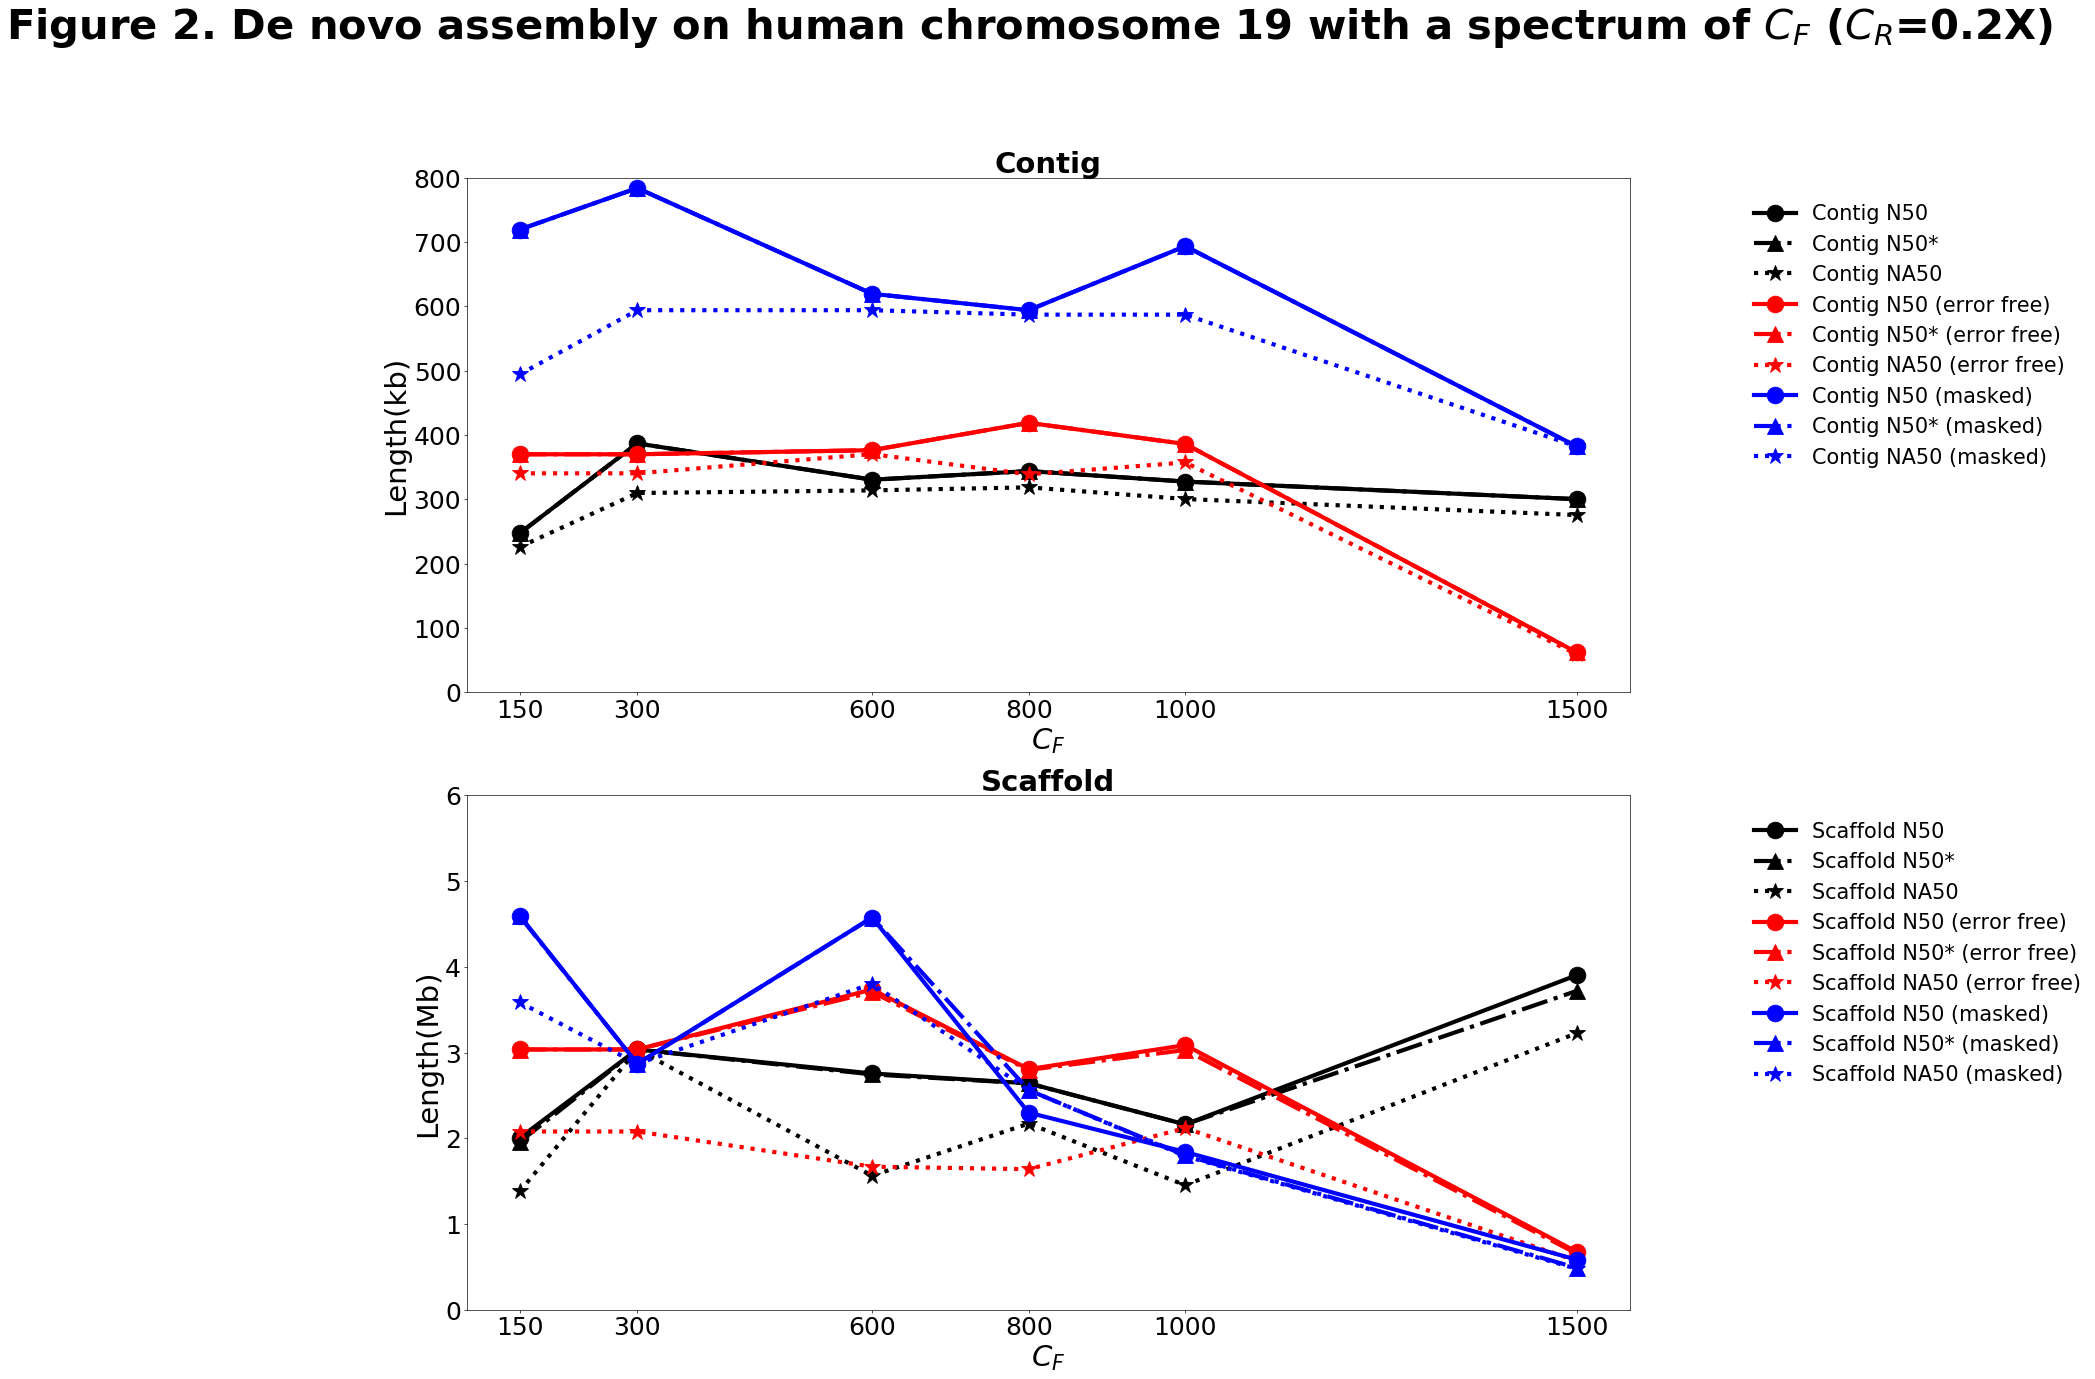

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25),dpi=60)
ax1=plt.subplot(211)
plt.xlabel('$C_F$',fontsize=35)
plt.title('Contig',fontsize=35,fontweight="bold")
x1=[150,300,600,800,1000,1500]
ax1.set_xticks([150,300,600,800,1000,1500])
plt.ylim((0, 800)) 


ax1.plot(x1,contig_N50_1,'ko-',lw=5,markersize=20,label='Contig N50')
ax1.plot(x1,contig_N50_s_1,'k^-.',lw=5,markersize=20,label='Contig N50*')
ax1.plot(x1,contig_NA50_1,'k*:',lw=5,markersize=20,label='Contig NA50')

ax1.plot(x1,contig_N50_2,'ro-',lw=5,markersize=20,label='Contig N50 (error free)')
ax1.plot(x1,contig_N50_s_2,'r^-.',lw=5,markersize=20,label='Contig N50* (error free)')
ax1.plot(x1,contig_NA50_2,'r*:',lw=5,markersize=20,label='Contig NA50 (error free)')

ax1.plot(x1,contig_N50_3,'bo-',lw=5,markersize=20,label='Contig N50 (masked)')
ax1.plot(x1,contig_N50_s_3,'b^-.',lw=5,markersize=20,label='Contig N50* (masked)')
ax1.plot(x1,contig_NA50_3,'b*:',lw=5,markersize=20,label='Contig NA50 (masked)')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax1.set_ylabel('Length(kb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)


ax1=plt.subplot(212)
plt.xlabel('$C_F$',fontsize=35)
plt.title('Scaffold',fontsize=35,fontweight="bold")
x1=[150,300,600,800,1000,1500]
ax1.set_xticks([150,300,600,800,1000,1500])

ax1.plot(x1,scaffold_N50_1,'ko-',lw=5,markersize=20,label='Scaffold N50')
ax1.plot(x1,scaffold_N50_s_1,'k^-.',lw=5,markersize=20,label='Scaffold N50*')
ax1.plot(x1,scaffold_NA50_1,'k*:',lw=5,markersize=20,label='Scaffold NA50')

ax1.plot(x1,scaffold_N50_2,'ro-',lw=5,markersize=20,label='Scaffold N50 (error free)')
ax1.plot(x1,scaffold_N50_s_2,'r^-.',lw=5,markersize=20,label='Scaffold N50* (error free)')
ax1.plot(x1,scaffold_NA50_2,'r*:',lw=5,markersize=20,label='Scaffold NA50 (error free)')

ax1.plot(x1,scaffold_N50_3,'bo-',lw=5,markersize=20,label='Scaffold N50 (masked)')
ax1.plot(x1,scaffold_N50_s_3,'b^-.',lw=5,markersize=20,label='Scaffold N50* (masked)')
ax1.plot(x1,scaffold_NA50_3,'b*:',lw=5,markersize=20,label='Scaffold NA50 (masked)')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim((0, 6)) 
ax1.set_ylabel('Length(Mb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.suptitle('Figure 2. De novo assembly on human chromosome 19 with a spectrum of $C_F$ ($C_R$=0.2X)', fontsize=50, verticalalignment='center',fontweight="bold")
plt.show()

# Conclusion: 
### 1. Comparing with figure 1, the qulity of contigs is only determined by C rather than either $C_F$ or $C_R$ independently.
### 2. Surprisingly scaffolds changed a little by increasing $C_F$ (I am simulating the data with $C_F=1500X$ to prompt C to be 300X )
### Noticed all the scaffold evaluation is based on "megabubble" which is much shorter than "pseudohap"

In [34]:
dir1='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS1/Calculate_stat.txt'
dir2='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS4/Calculate_stat.txt'
[contig_N50_1,contig_N50_s_1,contig_NA50_1,scaffold_N50_1,scaffold_N50_s_1,scaffold_NA50_1]=readfile(dir1)
[contig_N50_2,contig_N50_s_2,contig_NA50_2,scaffold_N50_2,scaffold_N50_s_2,scaffold_NA50_2]=readfile(dir2)


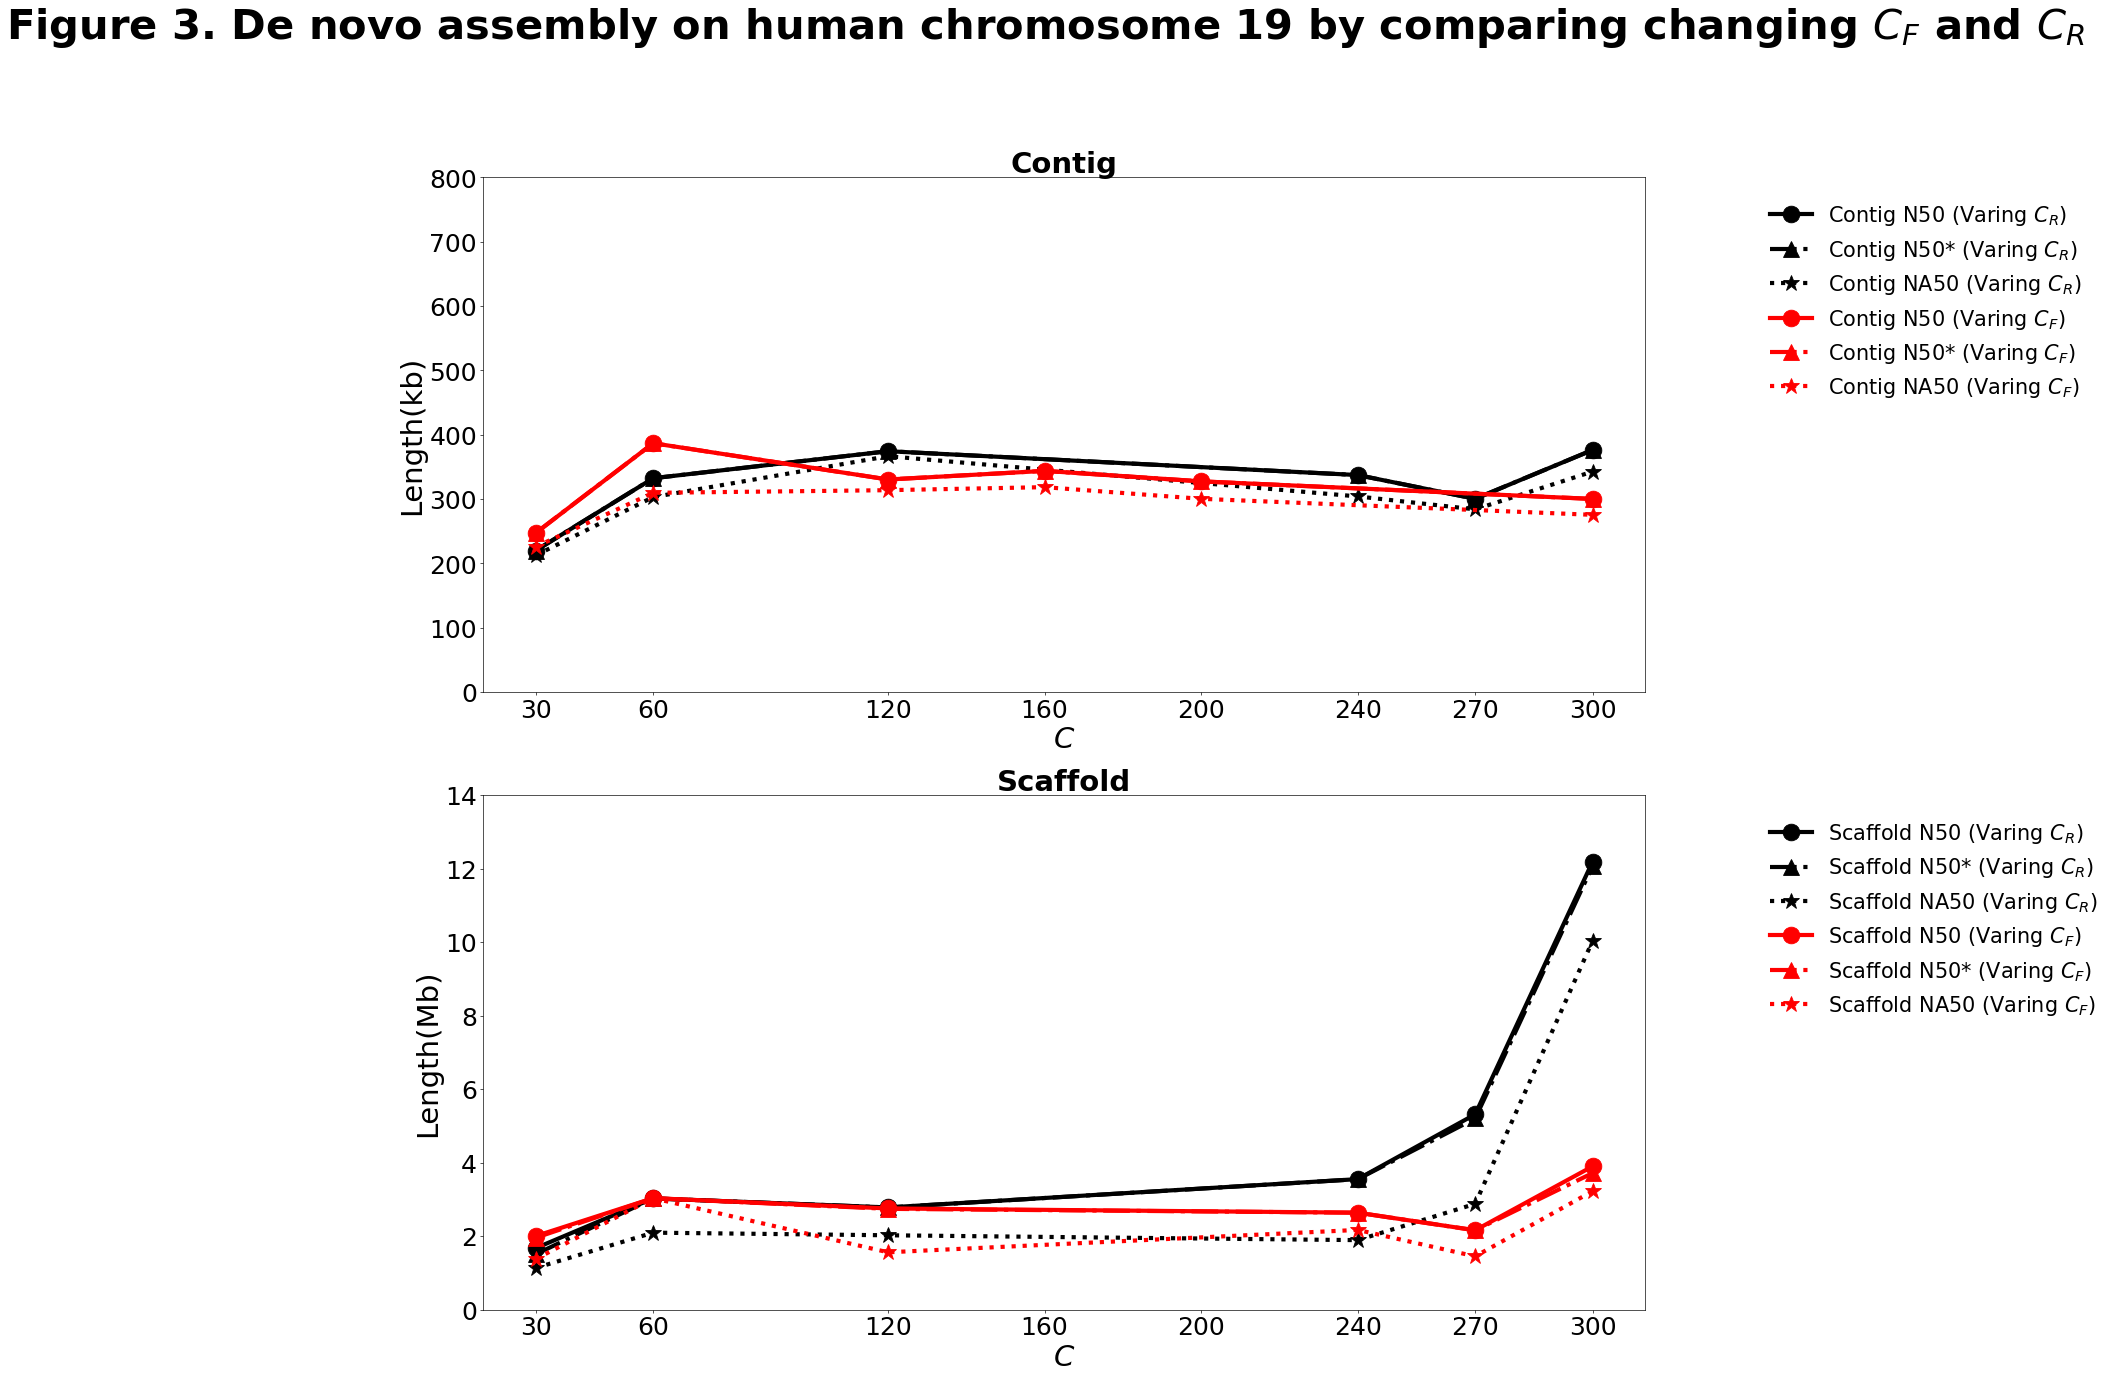

In [36]:
### import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25),dpi=60)
ax1=plt.subplot(211)
plt.xlabel('$C$',fontsize=35)
plt.title('Contig',fontsize=35,fontweight="bold")
x1=[30,60,120,240,270,300]
x2=[30,60,120,160,200,300]
ax1.set_xticks([30,60,120,160,200,240,270,300])
plt.ylim((0, 800)) 


ax1.plot(x1,contig_N50_1,'ko-',lw=5,markersize=20,label='Contig N50 (Varing $C_R$)')
ax1.plot(x1,contig_N50_s_1,'k^-.',lw=5,markersize=20,label='Contig N50* (Varing $C_R$)')
ax1.plot(x1,contig_NA50_1,'k*:',lw=5,markersize=20,label='Contig NA50 (Varing $C_R$)')

ax1.plot(x2,contig_N50_2,'ro-',lw=5,markersize=20,label='Contig N50 (Varing $C_F$)')
ax1.plot(x2,contig_N50_s_2,'r^-.',lw=5,markersize=20,label='Contig N50* (Varing $C_F$)')
ax1.plot(x2,contig_NA50_2,'r*:',lw=5,markersize=20,label='Contig NA50 (Varing $C_F$)')


plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax1.set_ylabel('Length(kb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)


ax1=plt.subplot(212)
plt.xlabel('$C$',fontsize=35)
plt.title('Scaffold',fontsize=35,fontweight="bold")
x1=[30,60,120,240,270,300]
x2=[30,60,120,160,200,300]
ax1.set_xticks([30,60,120,160,200,240,270,300])
plt.ylim((0, 800)) 

ax1.plot(x1,scaffold_N50_1,'ko-',lw=5,markersize=20,label='Scaffold N50 (Varing $C_R$)')
ax1.plot(x1,scaffold_N50_s_1,'k^-.',lw=5,markersize=20,label='Scaffold N50* (Varing $C_R$)')
ax1.plot(x1,scaffold_NA50_1,'k*:',lw=5,markersize=20,label='Scaffold NA50 (Varing $C_R$)')

ax1.plot(x1,scaffold_N50_2,'ro-',lw=5,markersize=20,label='Scaffold N50 (Varing $C_F$)')
ax1.plot(x1,scaffold_N50_s_2,'r^-.',lw=5,markersize=20,label='Scaffold N50* (Varing $C_F$)')
ax1.plot(x1,scaffold_NA50_2,'r*:',lw=5,markersize=20,label='Scaffold NA50 (Varing $C_F$)')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim((0, 14)) 
ax1.set_ylabel('Length(Mb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.suptitle('Figure 3. De novo assembly on human chromosome 19 by comparing changing $C_F$ and $C_R$', fontsize=50, verticalalignment='center',fontweight="bold")
plt.show()

### Plot for evaluating $\mu_{FL}$, comparing 1%, error free and repeat masked genome

In [29]:
dir1='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS5/Calculate_stat.txt'
dir2='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/MuFL_errorfree/WGS_stat.txt'
dir3='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS14/Calculate_stat.txt'

[contig_N50_1,contig_N50_s_1,contig_NA50_1,scaffold_N50_1,scaffold_N50_s_1,scaffold_NA50_1]=readfile(dir1)
[contig_N50_2,contig_N50_s_2,contig_NA50_2,scaffold_N50_2,scaffold_N50_s_2,scaffold_NA50_2]=readfile(dir2)
[contig_N50_3,contig_N50_s_3,contig_NA50_3,scaffold_N50_3,scaffold_N50_s_3,scaffold_NA50_3]=readfile(dir3)

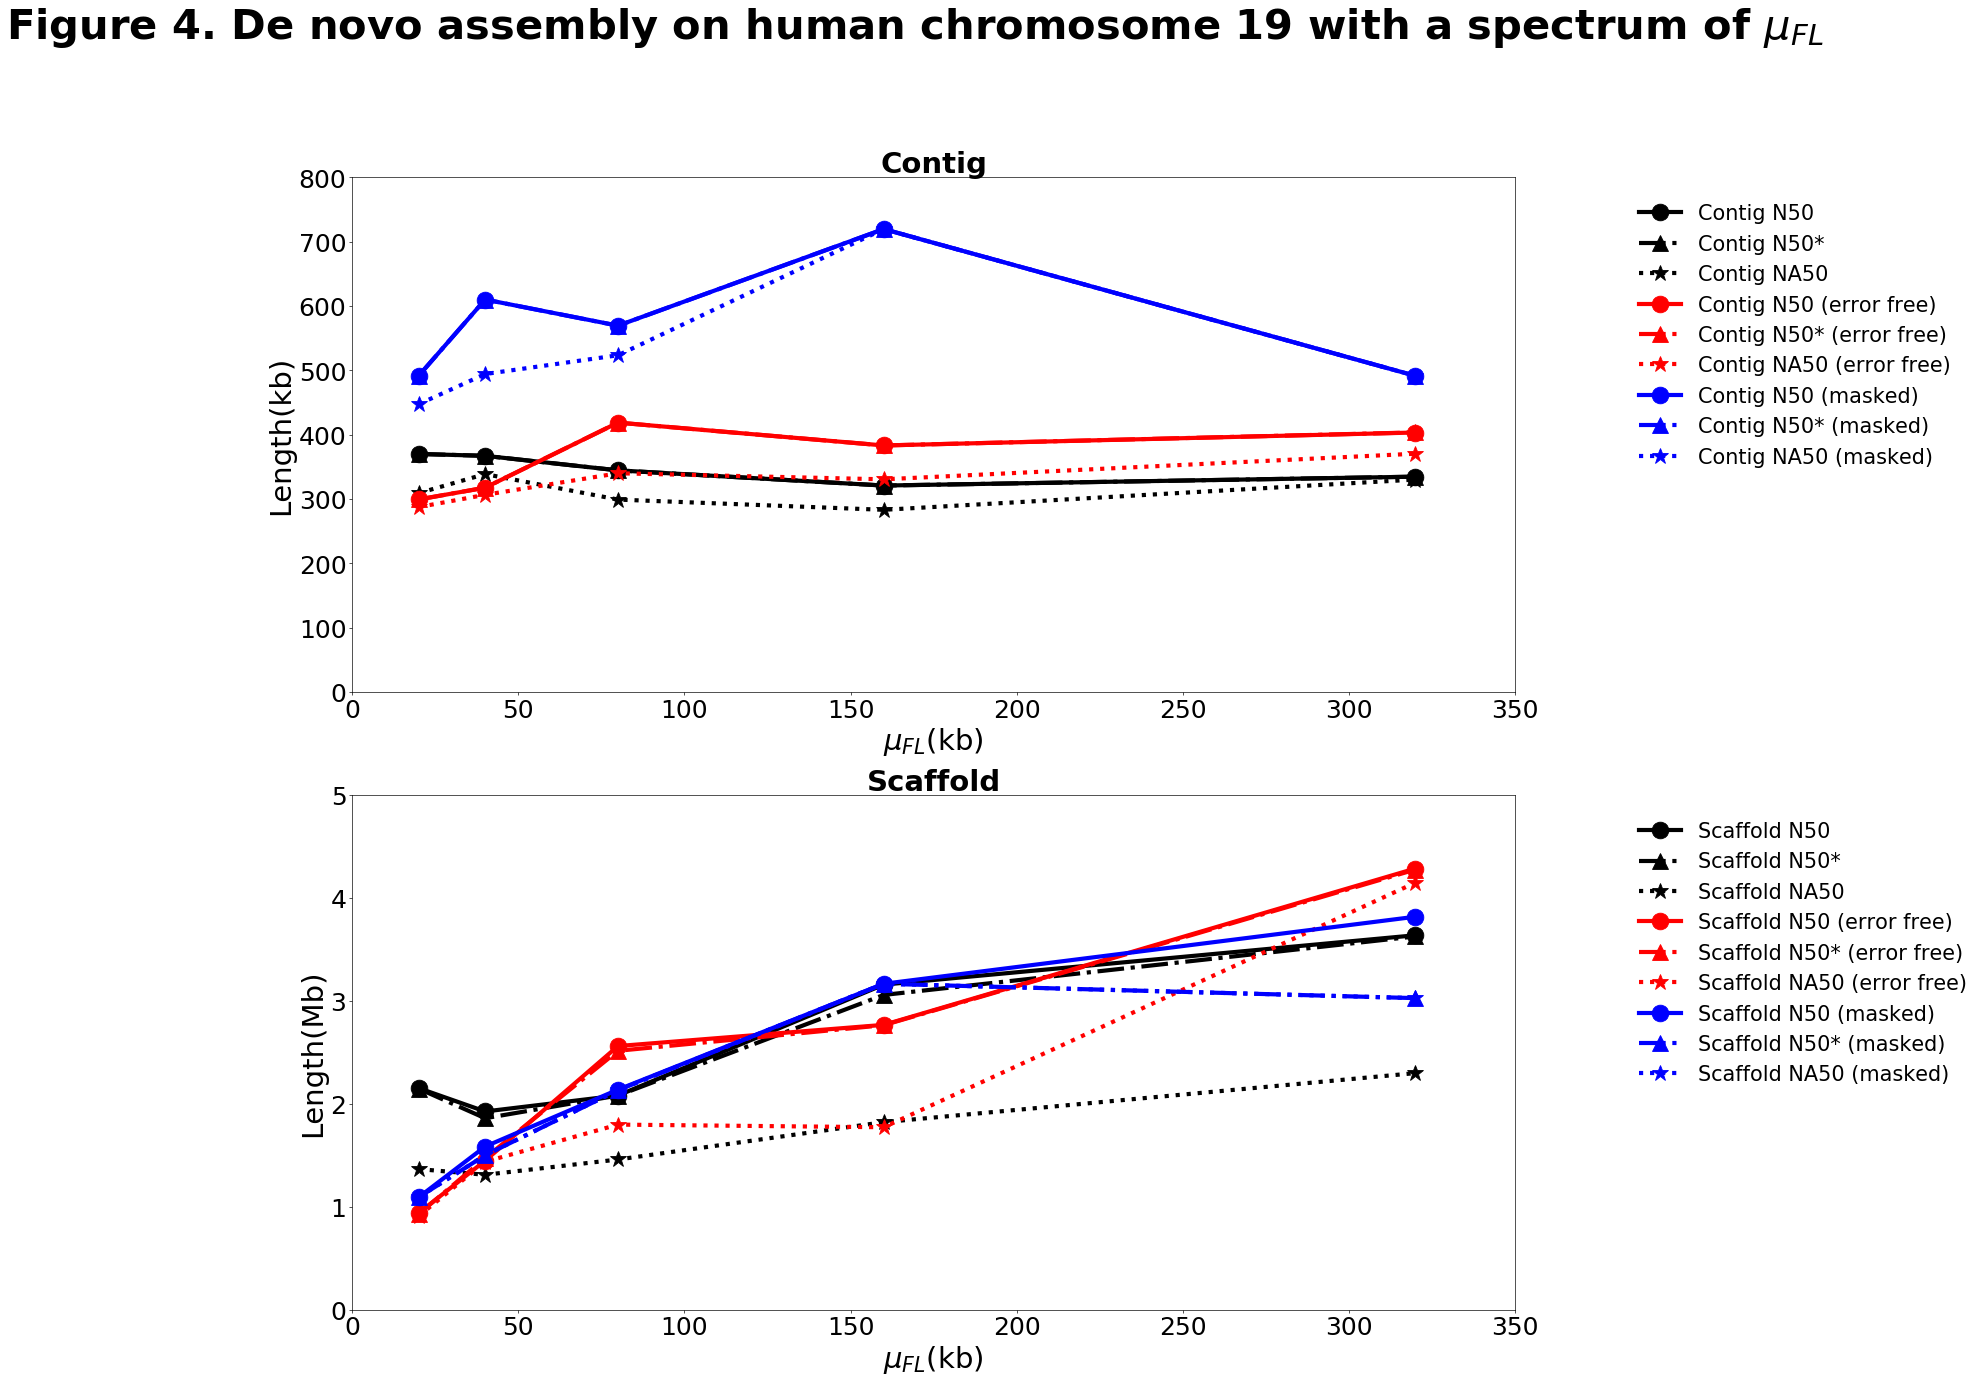

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25),dpi=60)
ax1=plt.subplot(211)
plt.xlabel('$\mu_{FL}$(kb)',fontsize=35)
plt.title('Contig',fontsize=35,fontweight="bold")
x1=[20,40,80,160,320]


ax1.plot(x1,contig_N50_1,'ko-',lw=5,markersize=20,label='Contig N50')
ax1.plot(x1,contig_N50_s_1,'k^-.',lw=5,markersize=20,label='Contig N50*')
ax1.plot(x1,contig_NA50_1,'k*:',lw=5,markersize=20,label='Contig NA50')

ax1.plot(x1,contig_N50_2,'ro-',lw=5,markersize=20,label='Contig N50 (error free)')
ax1.plot(x1,contig_N50_s_2,'r^-.',lw=5,markersize=20,label='Contig N50* (error free)')
ax1.plot(x1,contig_NA50_2,'r*:',lw=5,markersize=20,label='Contig NA50 (error free)')

ax1.plot(x1,contig_N50_3,'bo-',lw=5,markersize=20,label='Contig N50 (masked)')
ax1.plot(x1,contig_N50_s_3,'b^-.',lw=5,markersize=20,label='Contig N50* (masked)')
ax1.plot(x1,contig_NA50_3,'b*:',lw=5,markersize=20,label='Contig NA50 (masked)')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax1.set_ylabel('Length(kb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.ylim((0, 800)) 
plt.xlim((0, 350)) 

ax1=plt.subplot(212)
plt.xlabel('$\mu_{FL}$(kb)',fontsize=35)
plt.title('Scaffold',fontsize=35,fontweight="bold")
x1=[20,40,80,160,320]

ax1.plot(x1,scaffold_N50_1,'ko-',lw=5,markersize=20,label='Scaffold N50')
ax1.plot(x1,scaffold_N50_s_1,'k^-.',lw=5,markersize=20,label='Scaffold N50*')
ax1.plot(x1,scaffold_NA50_1,'k*:',lw=5,markersize=20,label='Scaffold NA50')

ax1.plot(x1,scaffold_N50_2,'ro-',lw=5,markersize=20,label='Scaffold N50 (error free)')
ax1.plot(x1,scaffold_N50_s_2,'r^-.',lw=5,markersize=20,label='Scaffold N50* (error free)')
ax1.plot(x1,scaffold_NA50_2,'r*:',lw=5,markersize=20,label='Scaffold NA50 (error free)')

ax1.plot(x1,scaffold_N50_3,'bo-',lw=5,markersize=20,label='Scaffold N50 (masked)')
ax1.plot(x1,scaffold_N50_s_3,'b^-.',lw=5,markersize=20,label='Scaffold N50* (masked)')
ax1.plot(x1,scaffold_NA50_3,'b*:',lw=5,markersize=20,label='Scaffold NA50 (masked)')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim((0, 350)) 
plt.ylim((0, 5)) 

ax1.set_ylabel('Length(Mb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.suptitle('Figure 4. De novo assembly on human chromosome 19 with a spectrum of $\mu_{FL}$', fontsize=50, verticalalignment='center',fontweight="bold")
plt.show()

# Conclusion: 

## Long DNA fragment generates longer scaffolds, but has little effect on contigs

### Plot for $N_{F/P}$

In [40]:
dir1='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS3/Calculate_stat.txt'
#dir2='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS2/Calculate_stat.txt'
#dir3='/oak/stanford/groups/arend/Eric/megabubble/simualtion_summary/chr19_SN2/TableS13/Calculate_stat.txt'

[contig_N50_1,contig_N50_s_1,contig_NA50_1,scaffold_N50_1,scaffold_N50_s_1,scaffold_NA50_1]=readfile(dir1)
#[contig_N50_2,contig_N50_s_2,contig_NA50_2,scaffold_N50_2,scaffold_N50_s_2,scaffold_NA50_2]=readfile(dir2)
#[contig_N50_3,contig_N50_s_3,contig_NA50_3,scaffold_N50_3,scaffold_N50_s_3,scaffold_NA50_3]=readfile(dir3)

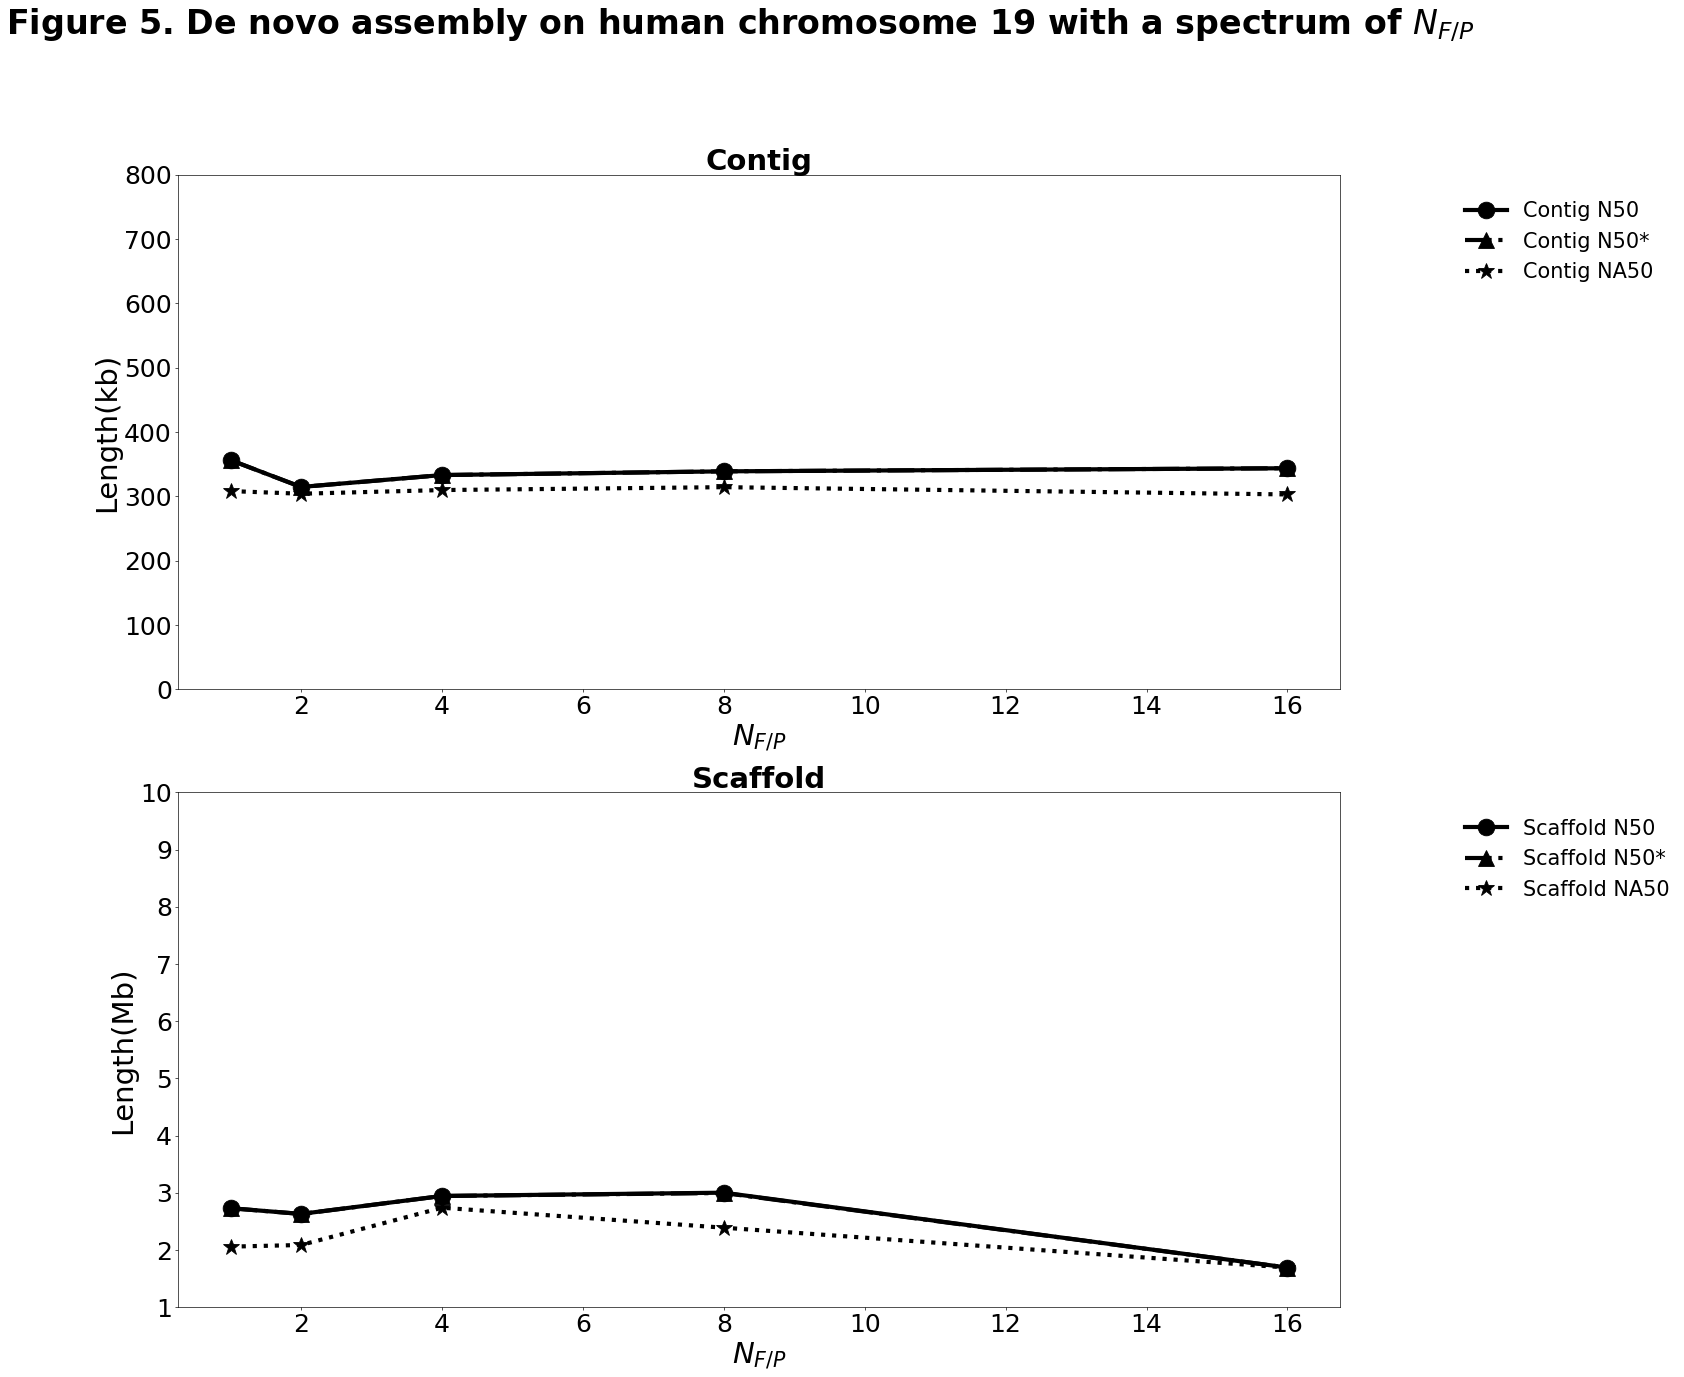

In [41]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25),dpi=60)
ax1=plt.subplot(211)
plt.xlabel('$N_{F/P}$',fontsize=35)
plt.title('Contig',fontsize=35,fontweight="bold")
x1=[1,2,4,8,16]
ax1.plot(x1,contig_N50_1,'ko-',lw=5,markersize=20,label='Contig N50')
ax1.plot(x1,contig_N50_s_1,'k^-.',lw=5,markersize=20,label='Contig N50*')
ax1.plot(x1,contig_NA50_1,'k*:',lw=5,markersize=20,label='Contig NA50')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim((0, 800)) 
ax1.set_ylabel('Length(kb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)


ax1=plt.subplot(212)
plt.xlabel('$N_{F/P}$',fontsize=35)
plt.title('Scaffold',fontsize=35,fontweight="bold")
x1=[1,2,4,8,16]

ax1.plot(x1,scaffold_N50_1,'ko-',lw=5,markersize=20,label='Scaffold N50')
ax1.plot(x1,scaffold_N50_s_1,'k^-.',lw=5,markersize=20,label='Scaffold N50*')
ax1.plot(x1,scaffold_NA50_1,'k*:',lw=5,markersize=20,label='Scaffold NA50')
plt.ylim((1, 10)) 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax1.set_ylabel('Length(Mb)', color='k',fontsize=35)

ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.suptitle('Figure 5. De novo assembly on human chromosome 19 with a spectrum of $N_{F/P}$', fontsize=40, verticalalignment='center',fontweight="bold")
plt.show()

# Conclusion: 

## No obvious change for both contig and scaffold by changing $N_{F/P}$

I also tried to simulate $N_{F/P}=32$, but Supernova2 doesn't work

# Results for whole genome simulation

In [42]:
from operator import itemgetter 
dir1='/oak/stanford/groups/arend/Eric/pseudohap/WGS/withX_sim_SN2/WGS_stat.txt'
[contig_N50_1,contig_N50_s_1,contig_NA50_1,scaffold_N50_1,scaffold_N50_s_1,scaffold_NA50_1]=readfile(dir1)
#[contig_N50_2,contig_N50_s_2,contig_NA50_2,scaffold_N50_2,scaffold_N50_s_2,scaffold_NA50_2]=readfile(dir2)
#[contig_N50_3,contig_N50_s_3,contig_NA50_3,scaffold_N50_3,scaffold_N50_s_3,scaffold_NA50_3]=readfile(dir3)

## Plot for increasing $C_R$

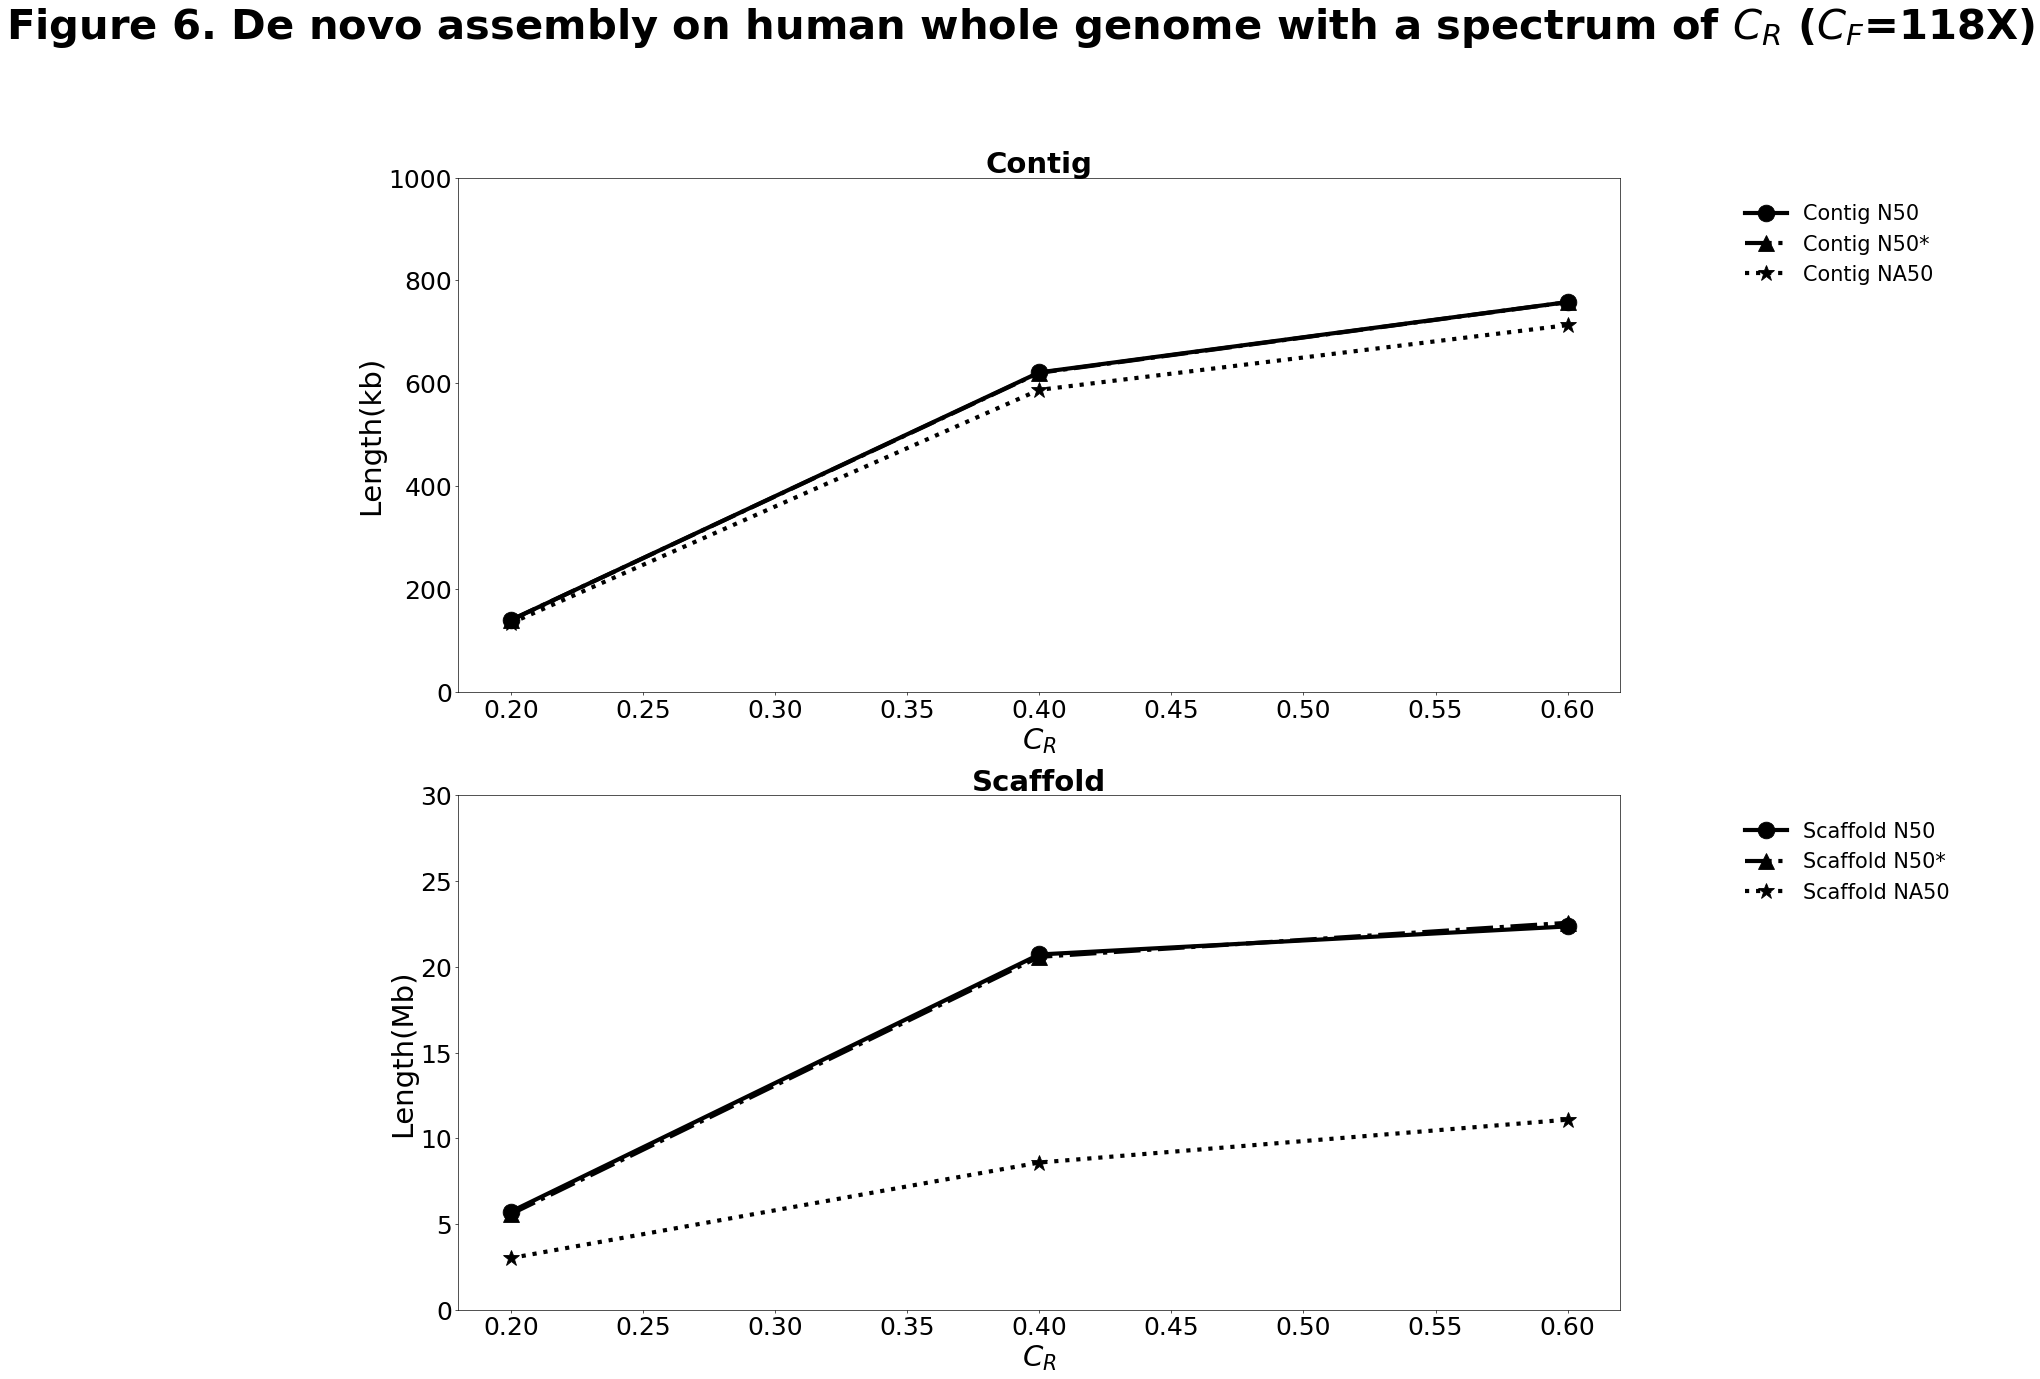

In [43]:
import numpy as np
import matplotlib.pyplot as plt
index=[1,3,4]
plt.figure(figsize=(25,25),dpi=60)
ax1=plt.subplot(211)
plt.xlabel('$C_R$',fontsize=35)
plt.title('Contig',fontsize=35,fontweight="bold")
x1=[0.2,0.4,0.6]
ax1.plot(x1,itemgetter(*index)(contig_N50_1),'ko-',lw=5,markersize=20,label='Contig N50')
ax1.plot(x1,itemgetter(*index)(contig_N50_s_1),'k^-.',lw=5,markersize=20,label='Contig N50*')
ax1.plot(x1,itemgetter(*index)(contig_NA50_1),'k*:',lw=5,markersize=20,label='Contig NA50')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax1.set_ylabel('Length(kb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.ylim((0, 1000)) 


ax1=plt.subplot(212)
plt.xlabel('$C_R$',fontsize=35)
plt.title('Scaffold',fontsize=35,fontweight="bold")
x1=[0.2,0.4,0.6]

ax1.plot(x1,itemgetter(*index)(scaffold_N50_1),'ko-',lw=5,markersize=20,label='Scaffold N50')
ax1.plot(x1,itemgetter(*index)(scaffold_N50_s_1),'k^-.',lw=5,markersize=20,label='Scaffold N50*')
ax1.plot(x1,itemgetter(*index)(scaffold_NA50_1),'k*:',lw=5,markersize=20,label='Scaffold NA50')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim((0, 30)) 
ax1.set_ylabel('Length(Mb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.suptitle('Figure 6. De novo assembly on human whole genome with a spectrum of $C_R$ ($C_F$=118X)', fontsize=50, verticalalignment='center',fontweight="bold")
plt.show()

# Conclusion
## If $C\approx50X$, $C_R$ doesn't help much on both contigs and scaffolds

## plot for increasing $C_F$

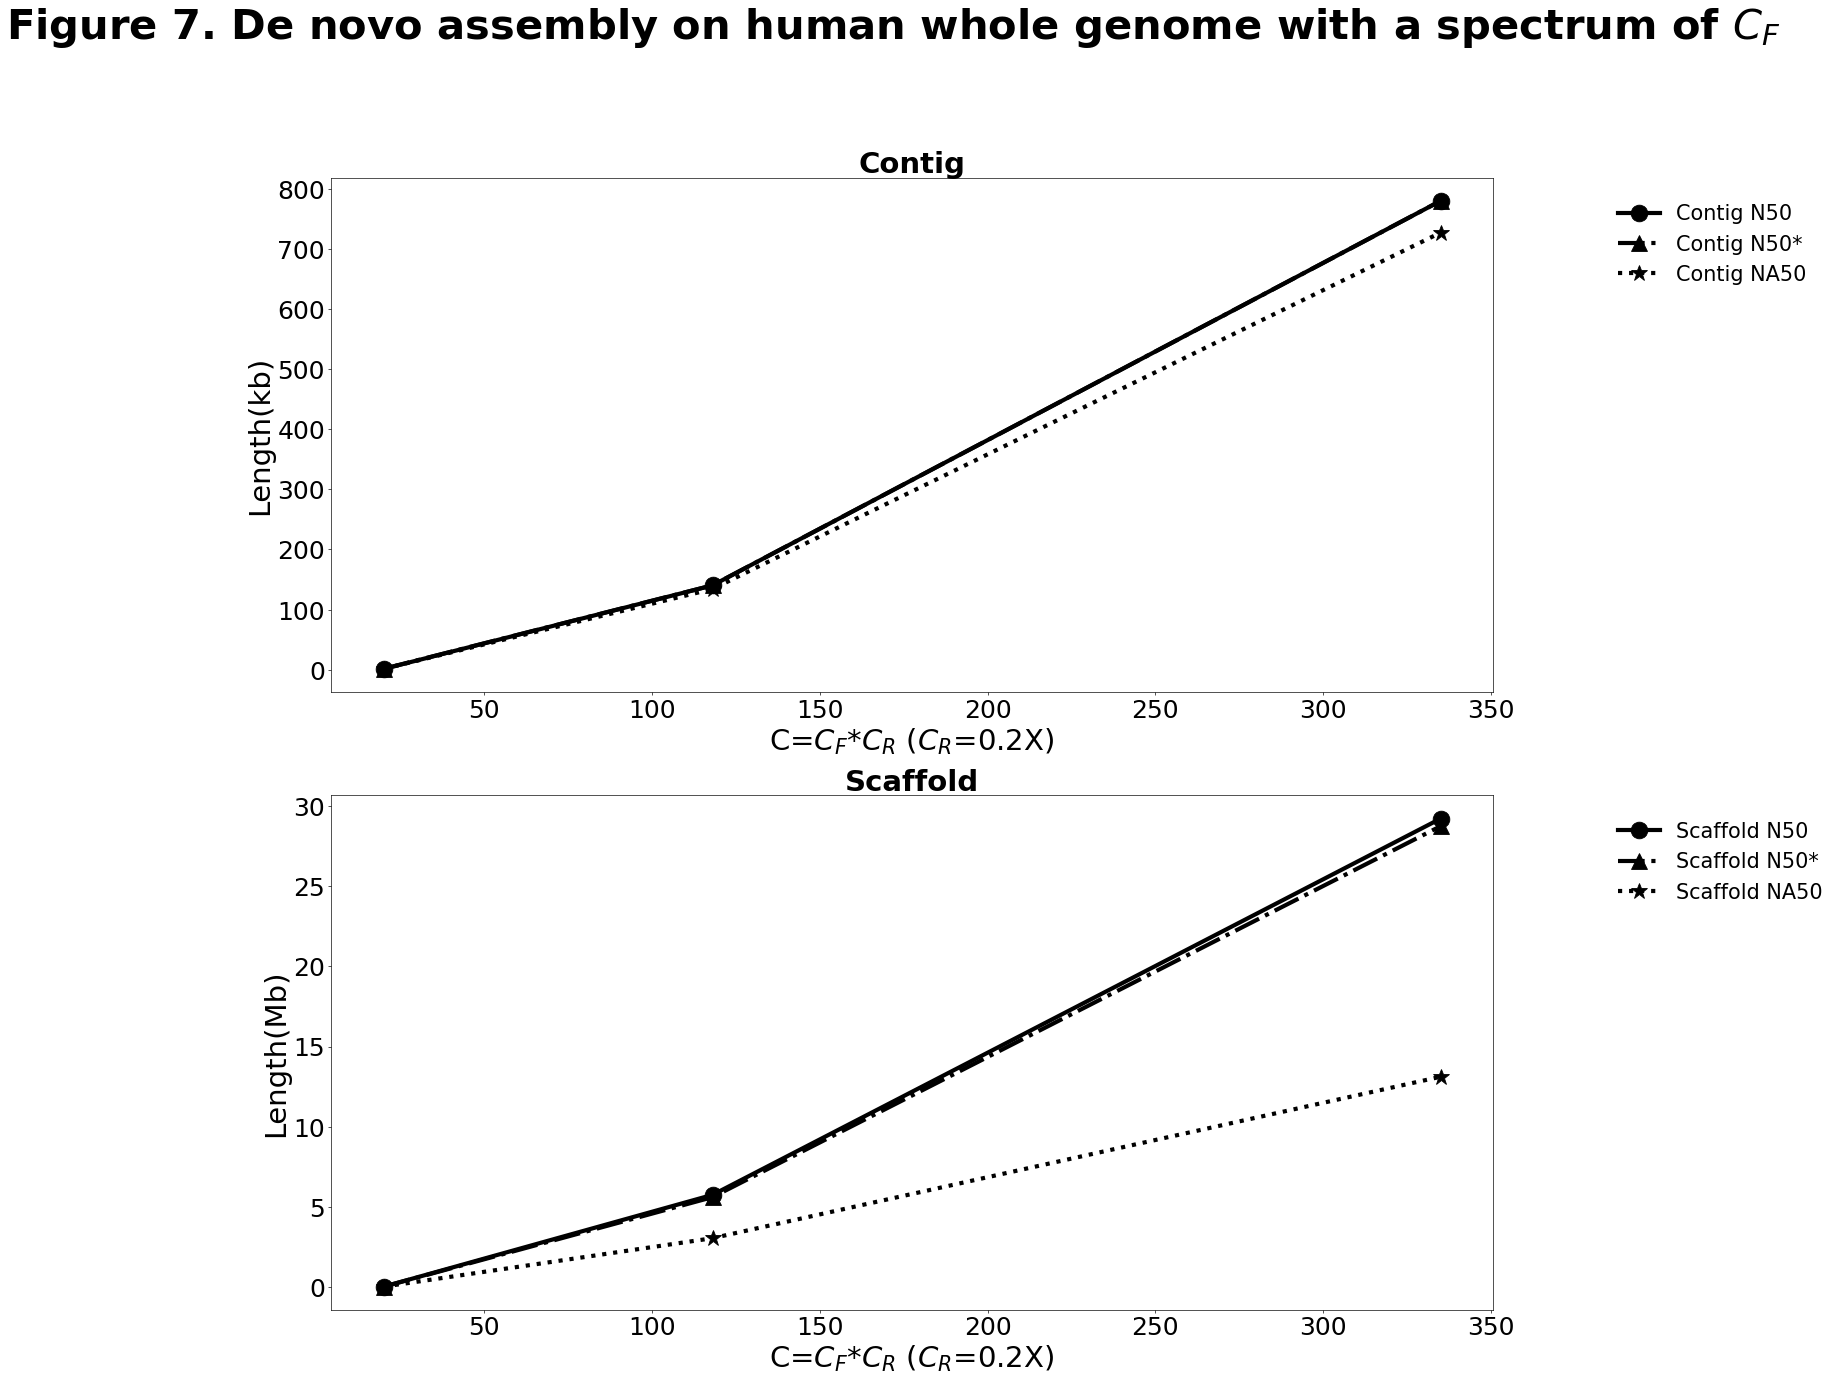

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25),dpi=60)
ax1=plt.subplot(211)
plt.xlabel('C=$C_F$*$C_R$ ($C_R$=0.2X)',fontsize=35)
plt.title('Contig',fontsize=35,fontweight="bold")
x1=[20,118,335]

ax1.plot(x1,contig_N50_1[0:3],'ko-',lw=5,markersize=20,label='Contig N50')
ax1.plot(x1,contig_N50_s_1[0:3],'k^-.',lw=5,markersize=20,label='Contig N50*')
ax1.plot(x1,contig_NA50_1[0:3],'k*:',lw=5,markersize=20,label='Contig NA50')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax1.set_ylabel('Length(kb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)


ax1=plt.subplot(212)
plt.xlabel('C=$C_F$*$C_R$ ($C_R$=0.2X)',fontsize=35)
plt.title('Scaffold',fontsize=35,fontweight="bold")
x1=[20,118,335]


ax1.plot(x1,scaffold_N50_1[0:3],'ko-',lw=5,markersize=20,label='Scaffold N50')
ax1.plot(x1,scaffold_N50_s_1[0:3],'k^-.',lw=5,markersize=20,label='Scaffold N50*')
ax1.plot(x1,scaffold_NA50_1[0:3],'k*:',lw=5,markersize=20,label='Scaffold NA50')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax1.set_ylabel('Length(Mb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.suptitle('Figure 7. De novo assembly on human whole genome with a spectrum of $C_F$', fontsize=50, verticalalignment='center',fontweight="bold")
plt.show()

## Conclusion
### Increasing $C_F$ seems a good option to enhance the assembly quality. For the similar $C$, the assembly of increasing $C_F$ is slighty better than increasing $C_R$. But larger $C_F$ still has potential ability to get better assembly. (should see real data)

## Plot for increasing $\mu_{FL}$

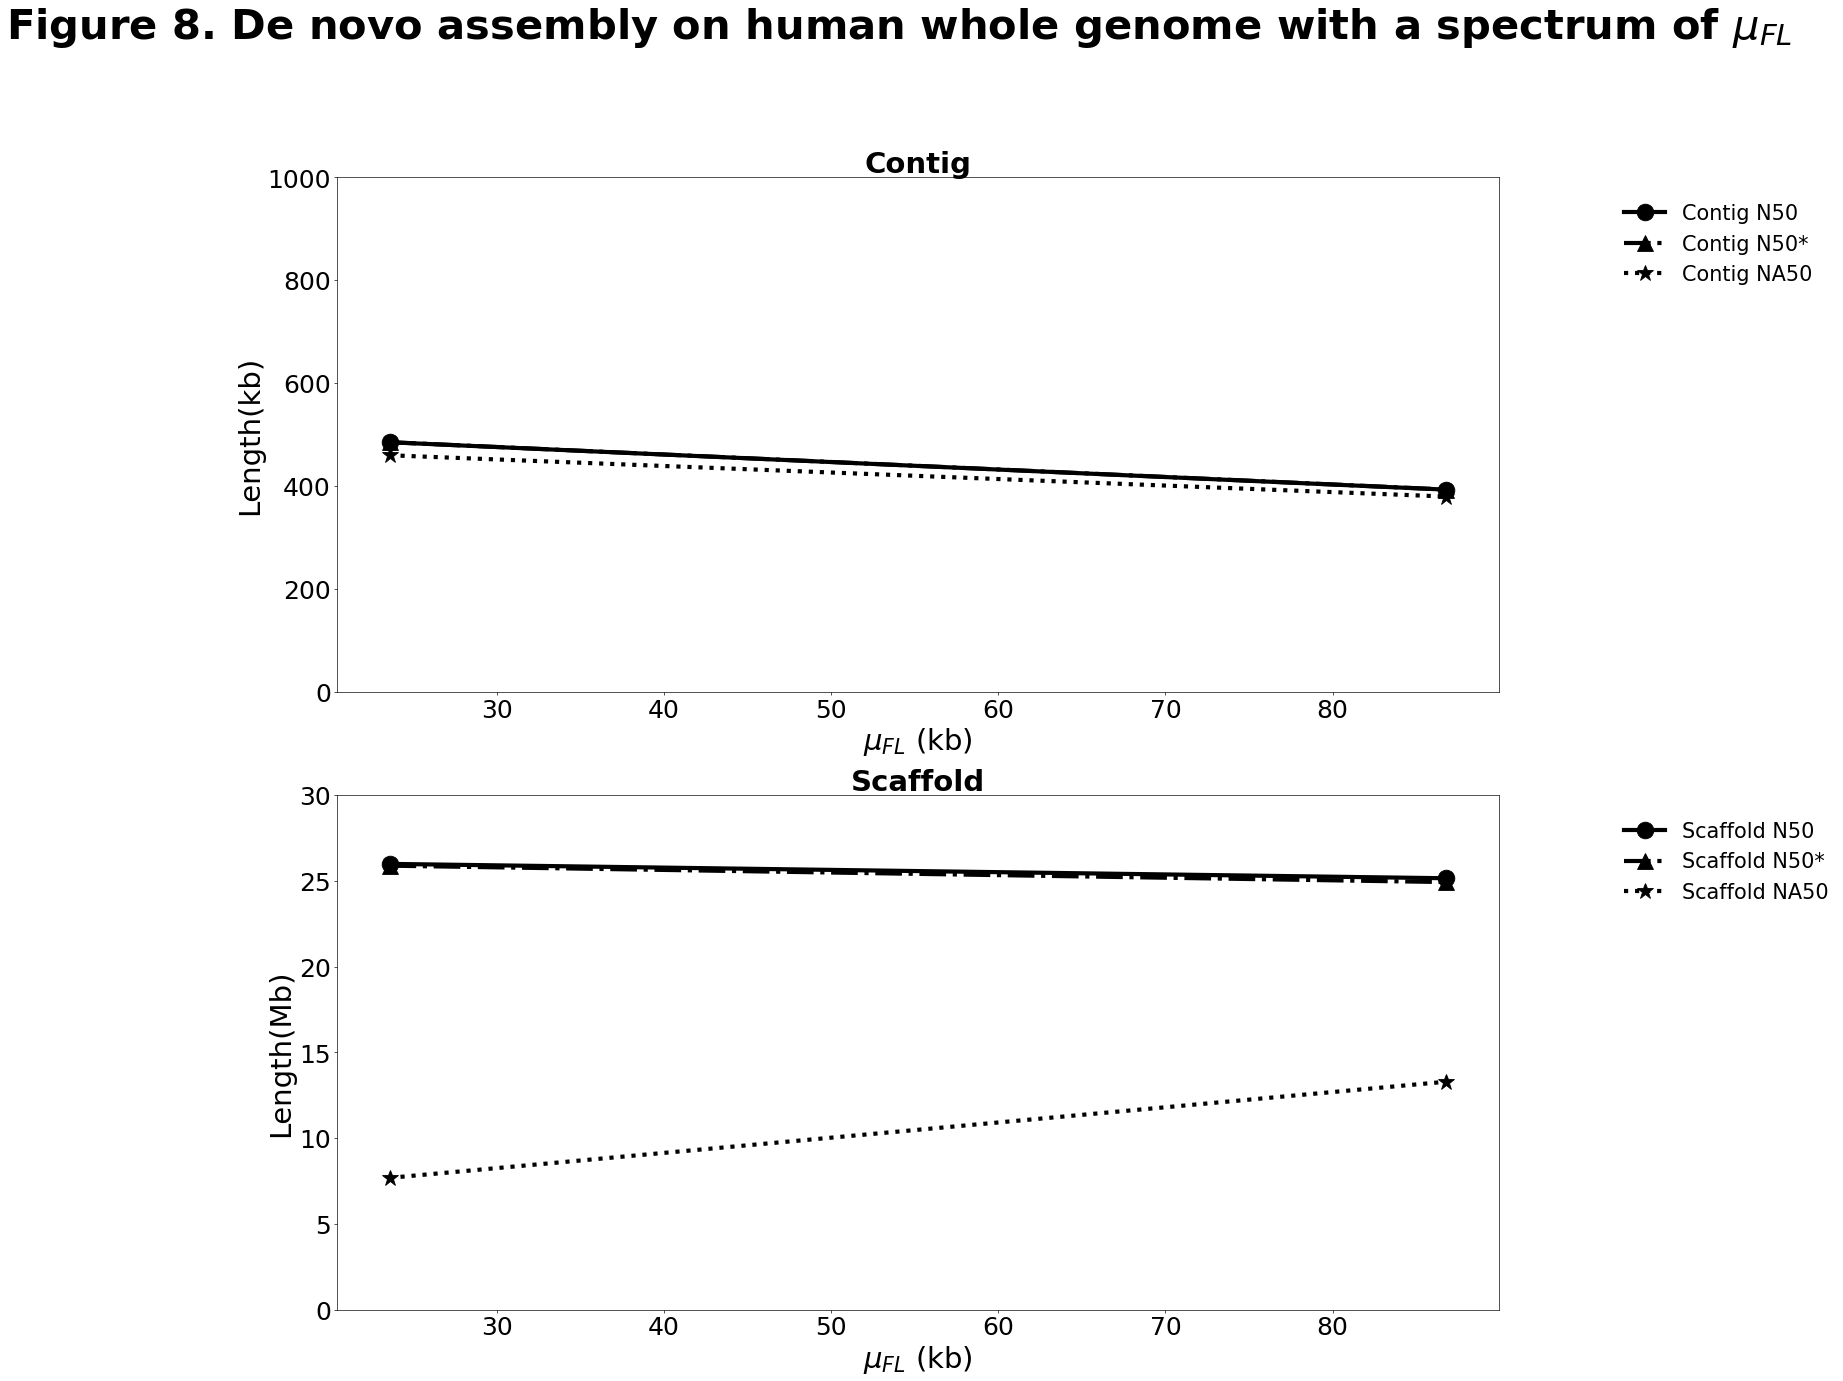

In [45]:
import numpy as np
import matplotlib.pyplot as plt
index=[5,6]
plt.figure(figsize=(25,25),dpi=60)
ax1=plt.subplot(211)
plt.xlabel('$\mu_{FL}$ (kb)',fontsize=35)
plt.title('Contig',fontsize=35,fontweight="bold")
x1=[23.6,86.8]
ax1.plot(x1,itemgetter(*index)(contig_N50_1),'ko-',lw=5,markersize=20,label='Contig N50')
ax1.plot(x1,itemgetter(*index)(contig_N50_s_1),'k^-.',lw=5,markersize=20,label='Contig N50*')
ax1.plot(x1,itemgetter(*index)(contig_NA50_1),'k*:',lw=5,markersize=20,label='Contig NA50')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax1.set_ylabel('Length(kb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.ylim((0, 1000)) 


ax1=plt.subplot(212)
plt.xlabel('$\mu_{FL}$ (kb)',fontsize=35)
plt.title('Scaffold',fontsize=35,fontweight="bold")
x1=[23.6,86.8]

ax1.plot(x1,itemgetter(*index)(scaffold_N50_1),'ko-',lw=5,markersize=20,label='Scaffold N50')
ax1.plot(x1,itemgetter(*index)(scaffold_N50_s_1),'k^-.',lw=5,markersize=20,label='Scaffold N50*')
ax1.plot(x1,itemgetter(*index)(scaffold_NA50_1),'k*:',lw=5,markersize=20,label='Scaffold NA50')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim((0, 30)) 
ax1.set_ylabel('Length(Mb)', color='k',fontsize=35)
ax1.legend(bbox_to_anchor=(1.1, 0.965), loc=2, borderaxespad=0.,fontsize=25,frameon=False)
plt.suptitle('Figure 8. De novo assembly on human whole genome with a spectrum of $\mu_{FL}$', fontsize=50, verticalalignment='center',fontweight="bold")
plt.show()

# Conclusion
## Linked-reads with long DNA fragements can generate more accurate scaffolds (NA50: 7.69M vs. 13.30M)